`Imports & Reading Data`

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.utils import load_img
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link to [Dataset](https://www.kaggle.com/datasets/msambare/fer2013)

In [ ]:
'''
Unzip the test & train datasets into a 'data/face' 
folder path to work with code or use dataset as desired.
'''

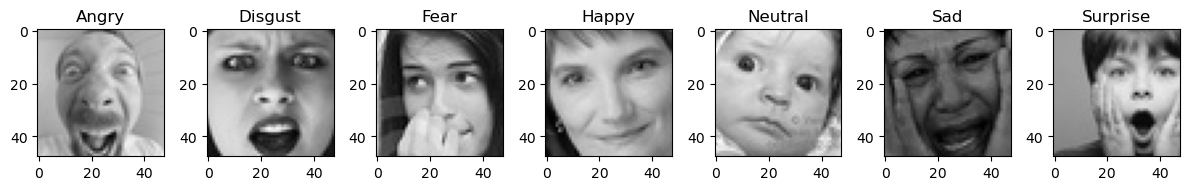

In [2]:
IMG_SIZE = 48
base_dir = "./data/face"

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

plt.figure(figsize=(12, 12))

for i, emotion in enumerate(emotions, 1):
    img_path = os.path.join(base_dir, "train", emotion)
    img_file = os.listdir(img_path)[0] 
    img = load_img(os.path.join(img_path, img_file), target_size=(IMG_SIZE, IMG_SIZE))
    
    plt.subplot(1, 7, i)
    plt.imshow(img)
    plt.title(emotion.capitalize())    
plt.tight_layout()

`Data Preprocessing`

In [3]:
BATCH_SIZE  = 64
train_dir = "data/face/train" 
validation_dir = "data/face/test"

train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    width_shift_range = 0.1,        
    height_shift_range = 0.1,       
    horizontal_flip = True,                  
    validation_split = 0.2          
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode='grayscale', 
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset = 'training'
    )

valid_datagen = ImageDataGenerator(
    rescale = 1./255,               
    validation_split = 0.2          
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    color_mode='grayscale',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset = 'validation'   )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [4]:
print("Image shape in train generator:", train_generator.image_shape)
print("Image shape in validation generator:", validation_generator.image_shape)

Image shape in train generator: (48, 48, 1)
Image shape in validation generator: (48, 48, 1)


`Build Model & Train`

In [5]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization


model = Sequential([
Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)),
BatchNormalization(),
Conv2D(64, kernel_size=(3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, kernel_size=(3, 3), activation='relu'),
BatchNormalization(),
Conv2D(128, kernel_size=(3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(256, kernel_size=(3, 3), activation='relu'),
BatchNormalization(),
Conv2D(256, kernel_size=(3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(256, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(7, activation='softmax'),
])

2024-04-18 02:53:22.540651: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-18 02:53:22.540680: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-18 02:53:22.540692: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-18 02:53:22.540732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 02:53:22.540747: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
                          optimizer=Adam(learning_rate=0.0001),
                          metrics=['accuracy'])

In [7]:
model_checkpoint = ModelCheckpoint(
    filepath='models/fmodel_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
)

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[model_checkpoint]
)

Epoch 1/50


2024-04-18 02:53:24.277624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-18 02:53:24.394250: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


359/359 [==============================] - 24s 50ms/step - loss: 2.4333 - accuracy: 0.2075 - val_loss: 1.9112 - val_accuracy: 0.2465
Epoch 2/50
359/359 [==============================] - 15s 41ms/step - loss: 1.9569 - accuracy: 0.2612 - val_loss: 1.6871 - val_accuracy: 0.3254
Epoch 3/50
359/359 [==============================] - 15s 41ms/step - loss: 1.8149 - accuracy: 0.3015 - val_loss: 1.7056 - val_accuracy: 0.3380
Epoch 4/50
359/359 [==============================] - 16s 44ms/step - loss: 1.7280 - accuracy: 0.3352 - val_loss: 1.6602 - val_accuracy: 0.3799
Epoch 5/50
359/359 [==============================] - 15s 41ms/step - loss: 1.6711 - accuracy: 0.3578 - val_loss: 1.5819 - val_accuracy: 0.3987
Epoch 6/50
359/359 [==============================] - 15s 41ms/step - loss: 1.6227 - accuracy: 0.3757 - val_loss: 1.5408 - val_accuracy: 0.4183
Epoch 7/50
359/359 [==============================] - 15s 42ms/step - loss: 1.5831 - accuracy: 0.3945 - val_loss: 1.4680 - val_accuracy: 0.4546
Epo

In [9]:
model_json = model.to_json()
with open("models/fmodel.json", "w") as json_file:
    json_file.write(model_json)

In [10]:
model.save('models/fmodel.h5')

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


`Model Evaluation`

In [16]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print ("Accuracy on test dataset:", val_accuracy)
print ("Loss on test dataset:", val_loss)

23/23 [==============================] - 1s 18ms/step - loss: 1.0012 - accuracy: 0.6369
Accuracy on test dataset: 0.6368715167045593
Loss on test dataset: 1.0012465715408325


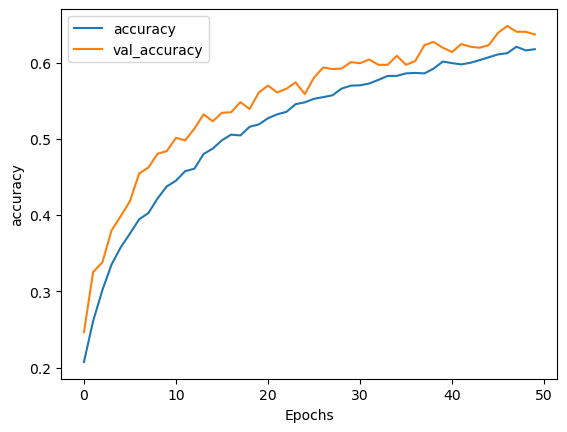

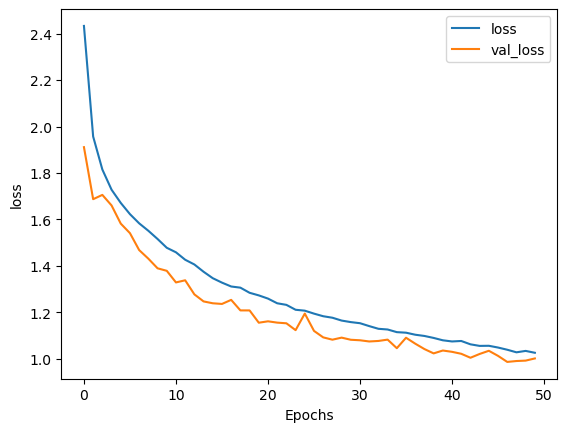

In [17]:
# Visualize Training Graph
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

23/23 [==============================] - 0s 14ms/step


Text(0.5, 1.0, 'Confusion Matrix')

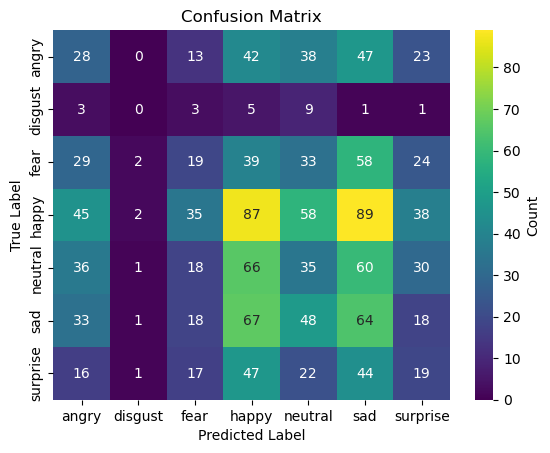

In [18]:
# Confusion Matrix
class_names = list(train_generator.class_indices.keys())
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
custom_palette = sns.color_palette("viridis", as_cmap=True)


sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=custom_palette,
            xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Count'})

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
